<a href="https://colab.research.google.com/github/GustavoRosso/PythonEMercadoFinanceiro/blob/main/CAP%C3%8DTULO_11_PROCESSAMENTO_EM_PARALELO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CAPÍTULO 11 - PROCESSAMENTO EM PARALELO

#Explicação

### 11.2 MÓDULO THREAD - Explicação

In [3]:
# 11.2 MÓDULO THREAD - Explicação

import threading

def Frase(texto):
    print(texto)
    return

for i in range(5):
    t = threading.Thread(target=Frase,args=('tarefa executada',))
    t.start()
    t.join()

tarefa executada
tarefa executada
tarefa executada
tarefa executada
tarefa executada


##11.3 THREAD EM OPERAÇÕES MATEMÁTICA - Explicação 1

In [4]:
# 11.3 THREAD EM OPERAÇÕES MATEMÁTICA - Explicação 1

import threading
import numpy as np

def Squad(num):
    s = num*2
    print(s)
    return

k1 = np.array([1,2,3])
k2 = np.array([5,6,7])
t1 = threading.Thread(target=Squad, args=(k1,))
t2 = threading.Thread(target=Squad, args=(k2,))
#+++++++++++++++++ Dispara o processo 1 ++++++++++++++++++++++++++
t1.start()
#+++++++++++++++++ Dispara o processo 2 ++++++++++++++++++++++++++
t2.start()
#+++++++++++++++++ Ordem para parar o processo 1 +++++++++++++++++
t1.join()
#+++++++++++++++++ Ordem para parar o processo 2 +++++++++++++++++
t2.join()

[2 4 6]
[10 12 14]


##11.3 THREAD EM OPERAÇÕES MATEMÁTICA - Explicação 2

In [5]:
# 11.3 THREAD EM OPERAÇÕES MATEMÁTICA - Explicação 2

import threading
import numpy as np

def Squad(num):
    s = num*2
    print(s)
    return

k1 = np.array([1,2,3])
k2 = np.array([5,6,7])
t1 = threading.Thread(target=Squad, args=(k1,))
t2 = threading.Thread(target=Squad, args=(k2,))
#+++++++++++++++++ Dispara o processo 1 ++++++++++++++++++++++++++
t2.start()
#+++++++++++++++++ Dispara o processo 2 ++++++++++++++++++++++++++
t1.start()
#+++++++++++++++++ Ordem para parar o processo 1 +++++++++++++++++
t1.join()
#+++++++++++++++++ Ordem para parar o processo 2 +++++++++++++++++
t2.join()

[10 12 14]
[2 4 6]


##11.4 RETORNANDO VALORES CALCULADOS NO THREAD - Explicação 1


In [6]:
# 11.4 RETORNANDO VALORES CALCULADOS NO THREAD - Explicação 1

import threading

def Squad(num, res):
    s = num * 2
    res.append(s)
    return
#+++++++++++++++++++++++ Programa principal +++++++++++++++++
res = []
for i in range(5):
    t = threading.Thread(target=Squad, args = (i,res))
    t.start()
    t.join()
#++++++ Impressão do resultado calculado nos processos ++++++
print(res)

[0, 2, 4, 6, 8]


##11.4 RETORNANDO VALORES CALCULADOS NO THREAD - Explicação 2


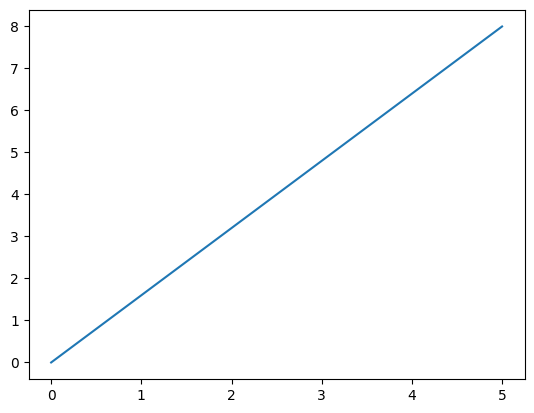

In [7]:
# 11.4 RETORNANDO VALORES CALCULADOS NO THREAD - Explicação 2

import threading
import matplotlib.pyplot as fig
import numpy as np

def Squad(num, res):
    s = num * 2
    res.append(s)
    return
#+++++++++++++++++++++++ Programa principal +++++++++++++++++
res = []
for i in range(5):
    t = threading.Thread(target=Squad, args = (i,res))
    t.start()
    t.join()
#++++++ Impressão do resultado calculado nos processos ++++++

res = np.array(res)
eixox = np.linspace(0,len(res), len(res))
fig.plot(eixox,res)

##11.5 PROCESSOS PARALELOS COM POOL E MAP - Explicação 1


In [8]:
# 11.5 PROCESSOS PARALELOS COM POOL E MAP - Explicação 1

import multiprocessing as mp
import numpy as np

def cubo(x):
    return np.sin(x**3)

if __name__ == '__main__':
    k = range(1,7)
    p = mp.Pool(processes=32)
    res = p.map(cubo,k)
    print(res)
    p.close()

[0.8414709848078965, 0.9893582466233818, 0.956375928404503, 0.9200260381967906, -0.6160404591886565, 0.6960584883449115]


##11.5 PROCESSOS PARALELOS COM POOL E MAP - Explicação 2


In [9]:
# 11.5 PROCESSOS PARALELOS COM POOL E MAP - Explicação 2

import timeit
code1 = """
import multiprocessing as mp
import numpy as np
def cubo(x):
    return np.sin(x**3)

if __name__ == '__main__':
    k = range(1,7)
    p = mp.Pool(processes=32)
    res = p.map(cubo,k)
    print(res)
    p.close()
"""
code2 = """
for i in range(1,7):
    x = i**3
"""
code3 = """
import threading
import numpy as np
def cubo(x):
    return np.sin(x**3)
if __name__ == '__main__':
    k = range(1,7)
    t = threading.Thread(target=Squad, args = (k,))
    t.start()
    t.join()
"""
tempo1 = timeit.timeit(code1, number = 1000000)/1000000
print(tempo1)

8.256078849999539e-07


##11.6 SIMULAÇÃO ESTOCÁSTICA COM PROCESSOS PARALELOS POOL E MAP


0.1509091854095459


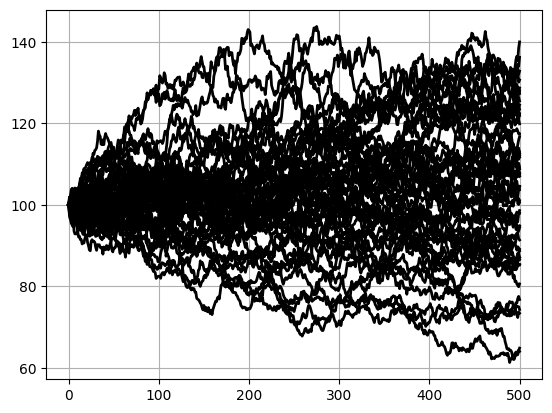

In [10]:
# 11.6 SIMULAÇÃO ESTOCÁSTICA COM PROCESSOS PARALELOS POOL E MAP

import multiprocessing as mp
import numpy as np
import math
import matplotlib.pyplot as fig
from time import time
def simul_estoc(x):
    M,I = x
    S0 = 100
    r = 0.05
    sigma = 0.2
    T = 1
    dt = T/M
    y = np.zeros((M+1,I))
    y[0] = S0
    for t in range(1,M+1):
        y[t] = y[t-1]*np.exp((r-0.5*sigma**2)*dt+
        sigma*math.sqrt(dt)*np.random.standard_normal(I))
    return y

if __name__ == '__main__':
    t0 = time()
    p = mp.Pool(processes=2)
    res = p.map(simul_estoc,((500,50),))
    p.close()
    fig.plot(res[0][:],'-k',linewidth=2)
    fig.grid()
    print(time()-t0)